In [1]:
import sys
import logging

In [2]:
sys.path.insert(0, "/home/matthew/projects/hmm/dist/hmm-0.0.1-py3.7-linux-x86_64.egg")

In [3]:
from hmm import HMMClassifier, MultinomialHMM, HMMSelector, distance, HMMSearch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics

In [4]:
frame = pd.read_csv("../example_data.rolling.csv")

In [5]:
frame.shape

(68312, 22)

In [6]:
frame.head().T

0   1   2   3   4
Day-21   8   8   8   8   8
Day-20   8  11  12  10   9
Day-19  10   6  13   6  10
Day-18  10   6   0  10   6
Day-17   6   6   4   7   6
Day-16   6  10   4   8   6
Day-15  12   6  17   7  10
Day-14   0   6   0   6   9
Day-13   1   6   4   6   6
Day-12   4   6   2   6   8
Day-11   0   6   4   6   8
Day-10   4  10   3   6   7
Day-9    2   9   2  10  10
Day-8   12   8  16  10   7
Day-7    0   6   7   6   6
Day-6    4  10  14   6  11
Day-5    0   6   0   6   6
Day-4    0   6   2  10   6
Day-3    0   6   0   6  10
Day-2    0   6   4   6   8
Day-1    0   6   1   6   7
label    0   0   0   0   0

In [7]:
x_cols = [c for c in frame.columns if c.startswith("Day")]
X = frame[x_cols]
Y = frame["label"]

In [8]:
train_X, test_X, train_Y, test_Y = sklearn.model_selection.train_test_split(X, Y, stratify=Y)

In [9]:
HMMClassifier.HMMClassifier?

In [10]:
classifier_mle = HMMClassifier.HMMClassifier(
{
    0: MultinomialHMM.MultinomialHMM(n_components=6, n_iterations=1000),
    1: MultinomialHMM.MultinomialHMM(n_components=6, n_iterations=1000)
})
classifier_map = HMMClassifier.HMMClassifier(
{
    0: MultinomialHMM.MultinomialHMM(n_components=6, n_iterations=1000),
    1: MultinomialHMM.MultinomialHMM(n_components=6, n_iterations=1000)
},
predict_method="map")

In [11]:
classifier_mle.fit(train_X, train_Y)
classifier_map.fit(train_X, train_Y)

2018-12-26 15:52:16,478 - hmm.impls.cy.generic - INFO - 181936.0kb - MainProcess/7381 pi=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 15:52:16,479 - hmm.impls.cy.generic - INFO - 181936.0kb - MainProcess/7381 A[0, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 15:52:16,480 - hmm.impls.cy.generic - INFO - 181936.0kb - MainProcess/7381 A[1, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 15:52:16,481 - hmm.impls.cy.generic - INFO - 181936.0kb - MainProcess/7381 A[2, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 15:52:16,482 - hmm.impls.cy.generic - INFO - 181936.0kb - MainProcess/7381 A[3, :]=[0.16666666666666666, 0.166

2018-12-26 15:52:31,195 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[32]=-1836319.5992946553
2018-12-26 15:52:31,610 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[33]=-1836160.3520729975
2018-12-26 15:52:32,020 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[34]=-1836006.4547292038
2018-12-26 15:52:32,437 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[35]=-1835856.2318444953
2018-12-26 15:52:32,887 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[36]=-1835708.1995255828
2018-12-26 15:52:33,334 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[37]=-1835561.0118295737
2018-12-26 15:52:33,781 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[38]=-1835413.4282466334
2018-12-26 15:52:34,224 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[39]=-1835264.2969553124
2018-12-26 15:52:34,634 - hmm.impls.cy.generic -

2018-12-26 15:53:00,489 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[101]=-1825695.273186049
2018-12-26 15:53:00,967 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[102]=-1825627.7816759355
2018-12-26 15:53:01,414 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[103]=-1825564.057513833
2018-12-26 15:53:01,833 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[104]=-1825503.9965825453
2018-12-26 15:53:02,263 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[105]=-1825447.4739423066
2018-12-26 15:53:02,686 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[106]=-1825394.3479940374
2018-12-26 15:53:03,100 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[107]=-1825344.4653861315
2018-12-26 15:53:03,518 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[108]=-1825297.6657469263
2018-12-26 15:53:03,931 - hmm.impls.cy.gen

2018-12-26 15:53:31,565 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[170]=-1824585.544881948
2018-12-26 15:53:32,006 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[171]=-1824584.4192766587
2018-12-26 15:53:32,452 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[172]=-1824583.3534264648
2018-12-26 15:53:32,886 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[173]=-1824582.3439715626
2018-12-26 15:53:33,315 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[174]=-1824581.3874236438
2018-12-26 15:53:33,741 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[175]=-1824580.4800673039
2018-12-26 15:53:34,180 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[176]=-1824579.6179080647
2018-12-26 15:53:34,610 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[177]=-1824578.796629619
2018-12-26 15:53:35,070 - hmm.impls.cy.gen

2018-12-26 15:54:05,102 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[239]=-1824559.8942884246
2018-12-26 15:54:05,645 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[240]=-1824559.7969950447
2018-12-26 15:54:06,146 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[241]=-1824559.697714415
2018-12-26 15:54:06,630 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[242]=-1824559.5960971273
2018-12-26 15:54:07,108 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[243]=-1824559.4917904139
2018-12-26 15:54:07,605 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[244]=-1824559.3844368788
2018-12-26 15:54:08,107 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[245]=-1824559.273671882
2018-12-26 15:54:08,615 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[246]=-1824559.159123352
2018-12-26 15:54:09,111 - hmm.impls.cy.gene

2018-12-26 15:54:41,467 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[308]=-1824509.2293393146
2018-12-26 15:54:41,978 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[309]=-1824506.586502921
2018-12-26 15:54:42,465 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[310]=-1824503.824155749
2018-12-26 15:54:42,944 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[311]=-1824500.9381585408
2018-12-26 15:54:43,426 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[312]=-1824497.9242903714
2018-12-26 15:54:44,021 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[313]=-1824494.7782445261
2018-12-26 15:54:44,529 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[314]=-1824491.495622854
2018-12-26 15:54:45,008 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[315]=-1824488.071929469
2018-12-26 15:54:45,523 - hmm.impls.cy.gener

2018-12-26 15:55:16,652 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[377]=-1823722.1921214093
2018-12-26 15:55:17,152 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[378]=-1823700.4223988943
2018-12-26 15:55:17,655 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[379]=-1823678.8048934613
2018-12-26 15:55:18,164 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[380]=-1823657.380428179
2018-12-26 15:55:18,674 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[381]=-1823636.1877768869
2018-12-26 15:55:19,173 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[382]=-1823615.263373744
2018-12-26 15:55:19,682 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[383]=-1823594.6410808496
2018-12-26 15:55:20,193 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[384]=-1823574.3520165628
2018-12-26 15:55:20,688 - hmm.impls.cy.gen

2018-12-26 15:55:54,107 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[446]=-1823067.3804318865
2018-12-26 15:55:54,802 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[447]=-1823066.1311425334
2018-12-26 15:55:55,555 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[448]=-1823064.9454261418
2018-12-26 15:55:56,316 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[449]=-1823063.8198431414
2018-12-26 15:55:57,006 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[450]=-1823062.7511452744
2018-12-26 15:55:57,653 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[451]=-1823061.736265877
2018-12-26 15:55:58,307 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[452]=-1823060.7723100735
2018-12-26 15:55:58,968 - hmm.impls.cy.generic - INFO - 641904.0kb - MainProcess/7381 log_prob[453]=-1823059.856545886
2018-12-26 15:55:59,642 - hmm.impls.cy.gen

2018-12-26 15:56:50,851 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[515]=-1823042.2893900177
2018-12-26 15:56:51,422 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[516]=-1823042.2404639265
2018-12-26 15:56:51,960 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[517]=-1823042.1938406813
2018-12-26 15:56:52,485 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[518]=-1823042.1493544816
2018-12-26 15:56:52,984 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[519]=-1823042.1068667127
2018-12-26 15:56:53,491 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[520]=-1823042.0662591883
2018-12-26 15:56:53,996 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[521]=-1823042.0274288752
2018-12-26 15:56:54,463 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[522]=-1823041.9902838673
2018-12-26 15:56:54,921 - hmm.impls.cy.g

2018-12-26 15:57:22,070 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[584]=-1823041.1976177625
2018-12-26 15:57:22,685 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[585]=-1823041.1948669255
2018-12-26 15:57:23,190 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[586]=-1823041.1922198008
2018-12-26 15:57:23,748 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[587]=-1823041.1896722727
2018-12-26 15:57:24,271 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[588]=-1823041.187220232
2018-12-26 15:57:24,781 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[589]=-1823041.18485994
2018-12-26 15:57:25,341 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[590]=-1823041.1825876536
2018-12-26 15:57:25,952 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[591]=-1823041.1803999138
2018-12-26 15:57:26,461 - hmm.impls.cy.gene

2018-12-26 15:57:59,885 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[653]=-1823041.1267392444
2018-12-26 15:58:00,335 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[654]=-1823041.1264691046
2018-12-26 15:58:00,786 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[655]=-1823041.126205915
2018-12-26 15:58:01,240 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[656]=-1823041.1259493004
2018-12-26 15:58:01,697 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[657]=-1823041.125699135
2018-12-26 15:58:02,167 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[658]=-1823041.1254550996
2018-12-26 15:58:02,616 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[659]=-1823041.1252169188
2018-12-26 15:58:03,078 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[660]=-1823041.1249843477
2018-12-26 15:58:03,524 - hmm.impls.cy.gen

2018-12-26 15:58:35,599 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[722]=-1823041.1136417512
2018-12-26 15:58:36,227 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[723]=-1823041.1133864599
2018-12-26 15:58:36,849 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[724]=-1823041.1131241969
2018-12-26 15:58:37,460 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[725]=-1823041.1128545848
2018-12-26 15:58:38,026 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[726]=-1823041.1125773555
2018-12-26 15:58:38,576 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[727]=-1823041.112292156
2018-12-26 15:58:39,146 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[728]=-1823041.1119986237
2018-12-26 15:58:39,674 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[729]=-1823041.111696443
2018-12-26 15:58:40,196 - hmm.impls.cy.gen

2018-12-26 15:59:08,092 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[791]=-1823041.0484165808
2018-12-26 15:59:08,512 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[792]=-1823041.0458931758
2018-12-26 15:59:08,940 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[793]=-1823041.043280486
2018-12-26 15:59:09,355 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[794]=-1823041.040575513
2018-12-26 15:59:09,777 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[795]=-1823041.0377749347
2018-12-26 15:59:10,195 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[796]=-1823041.0348755035
2018-12-26 15:59:10,612 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[797]=-1823041.0318738134
2018-12-26 15:59:11,026 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[798]=-1823041.0287663622
2018-12-26 15:59:11,437 - hmm.impls.cy.gen

2018-12-26 15:59:38,219 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[860]=-1823040.380375247
2018-12-26 15:59:38,662 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[861]=-1823040.3566677757
2018-12-26 15:59:39,100 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[862]=-1823040.3323023494
2018-12-26 15:59:39,538 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[863]=-1823040.3072675646
2018-12-26 15:59:39,996 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[864]=-1823040.281552154
2018-12-26 15:59:40,431 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[865]=-1823040.2551452077
2018-12-26 15:59:40,893 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[866]=-1823040.2280362088
2018-12-26 15:59:41,334 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[867]=-1823040.200214887
2018-12-26 15:59:41,764 - hmm.impls.cy.gene

2018-12-26 16:00:08,040 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[929]=-1823037.2718461915
2018-12-26 16:00:08,455 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[930]=-1823037.220245322
2018-12-26 16:00:08,876 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[931]=-1823037.1692185379
2018-12-26 16:00:09,287 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[932]=-1823037.1187935993
2018-12-26 16:00:09,695 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[933]=-1823037.068996726
2018-12-26 16:00:10,101 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[934]=-1823037.0198525484
2018-12-26 16:00:10,509 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[935]=-1823036.9713839851
2018-12-26 16:00:10,924 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[936]=-1823036.9236123553
2018-12-26 16:00:11,336 - hmm.impls.cy.gen

2018-12-26 16:00:36,558 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[998]=-1823035.3430399185
2018-12-26 16:00:36,974 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[999]=-1823035.3333568245
2018-12-26 16:00:36,997 - hmm.impls.cy.generic - INFO - 175076.0kb - MainProcess/7381 pi=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 16:00:36,998 - hmm.impls.cy.generic - INFO - 175076.0kb - MainProcess/7381 A[0, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 16:00:36,999 - hmm.impls.cy.generic - INFO - 175076.0kb - MainProcess/7381 A[1, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 16:00:37,000 - hmm.impls.cy.generic - INFO - 175076.0kb - MainProcess/7381 A[2, :]=[0.16666

2018-12-26 16:00:38,504 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[30]=-231764.00674968038
2018-12-26 16:00:38,552 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[31]=-231680.97793137145
2018-12-26 16:00:38,600 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[32]=-231609.63124445113
2018-12-26 16:00:38,647 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[33]=-231546.74404504866
2018-12-26 16:00:38,695 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[34]=-231490.11656890318
2018-12-26 16:00:38,743 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[35]=-231438.2803735639
2018-12-26 16:00:38,791 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[36]=-231390.26080310225
2018-12-26 16:00:38,838 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[37]=-231345.3976895342
2018-12-26 16:00:38,886 - hmm.impls.cy.generic - I

2018-12-26 16:00:41,877 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[100]=-230806.6614411391
2018-12-26 16:00:41,925 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[101]=-230806.6335161185
2018-12-26 16:00:41,972 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[102]=-230806.60797735243
2018-12-26 16:00:42,020 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[103]=-230806.58456049132
2018-12-26 16:00:42,068 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[104]=-230806.56303386483
2018-12-26 16:00:42,117 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[105]=-230806.54319424028
2018-12-26 16:00:42,165 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[106]=-230806.52486313827
2018-12-26 16:00:42,212 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[107]=-230806.5078836596
2018-12-26 16:00:42,259 - hmm.impls.cy.gene

2018-12-26 16:00:45,197 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[169]=-230806.19934356026
2018-12-26 16:00:45,245 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[170]=-230806.19789253813
2018-12-26 16:00:45,293 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[171]=-230806.19647712004
2018-12-26 16:00:45,342 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[172]=-230806.1950961451
2018-12-26 16:00:45,390 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[173]=-230806.19374850718
2018-12-26 16:00:45,439 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[174]=-230806.19243313707
2018-12-26 16:00:45,487 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[175]=-230806.19114900782
2018-12-26 16:00:45,535 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[176]=-230806.189895128
2018-12-26 16:00:45,583 - hmm.impls.cy.gene

2018-12-26 16:00:48,886 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[238]=-230806.1461781982
2018-12-26 16:00:48,943 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[239]=-230806.14577819084
2018-12-26 16:00:49,000 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[240]=-230806.14538326234
2018-12-26 16:00:49,056 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[241]=-230806.14499328856
2018-12-26 16:00:49,111 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[242]=-230806.14460814084
2018-12-26 16:00:49,166 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[243]=-230806.14422770185
2018-12-26 16:00:49,221 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[244]=-230806.14385185615
2018-12-26 16:00:49,273 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[245]=-230806.14348048807
2018-12-26 16:00:49,324 - hmm.impls.cy.ge

2018-12-26 16:00:53,079 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[307]=-230806.1258891641
2018-12-26 16:00:53,140 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[308]=-230806.1256561744
2018-12-26 16:00:53,203 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[309]=-230806.125424006
2018-12-26 16:00:53,266 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[310]=-230806.12519263462
2018-12-26 16:00:53,330 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[311]=-230806.12496204014
2018-12-26 16:00:53,396 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[312]=-230806.1247321982
2018-12-26 16:00:53,461 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[313]=-230806.12450308827
2018-12-26 16:00:53,529 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[314]=-230806.12427469005
2018-12-26 16:00:53,598 - hmm.impls.cy.generi

2018-12-26 16:00:57,905 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[376]=-230806.09070837288
2018-12-26 16:00:57,993 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[377]=-230806.08510152105
2018-12-26 16:00:58,079 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[378]=-230806.0789206431
2018-12-26 16:00:58,166 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[379]=-230806.07248469943
2018-12-26 16:00:58,252 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[380]=-230806.06617776366
2018-12-26 16:00:58,335 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[381]=-230806.06034981474
2018-12-26 16:00:58,416 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[382]=-230806.05522643382
2018-12-26 16:00:58,496 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[383]=-230806.05087443392
2018-12-26 16:00:58,572 - hmm.impls.cy.ge

2018-12-26 16:01:02,241 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[445]=-230806.00615001557
2018-12-26 16:01:02,318 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[446]=-230806.0059681976
2018-12-26 16:01:02,394 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[447]=-230806.0057882476
2018-12-26 16:01:02,473 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[448]=-230806.00561004764
2018-12-26 16:01:02,552 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[449]=-230806.00543348683
2018-12-26 16:01:02,631 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[450]=-230806.0052584612
2018-12-26 16:01:02,711 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[451]=-230806.00508487853
2018-12-26 16:01:02,791 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[452]=-230806.00491264422
2018-12-26 16:01:02,872 - hmm.impls.cy.gene

2018-12-26 16:01:06,919 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[514]=-230805.9951629304
2018-12-26 16:01:06,981 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[515]=-230805.9950089468
2018-12-26 16:01:07,044 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[516]=-230805.9948549241
2018-12-26 16:01:07,106 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[517]=-230805.99470086154
2018-12-26 16:01:07,168 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[518]=-230805.99454675647
2018-12-26 16:01:07,229 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[519]=-230805.99439260855
2018-12-26 16:01:07,292 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[520]=-230805.99423841637
2018-12-26 16:01:07,354 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[521]=-230805.99408417623
2018-12-26 16:01:07,416 - hmm.impls.cy.gene

2018-12-26 16:01:11,078 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[583]=-230805.9844015044
2018-12-26 16:01:11,130 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[584]=-230805.9842432829
2018-12-26 16:01:11,182 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[585]=-230805.9840850011
2018-12-26 16:01:11,233 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[586]=-230805.983926656
2018-12-26 16:01:11,284 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[587]=-230805.98376824838
2018-12-26 16:01:11,334 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[588]=-230805.9836097808
2018-12-26 16:01:11,385 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[589]=-230805.9834512512
2018-12-26 16:01:11,436 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[590]=-230805.98329265887
2018-12-26 16:01:11,485 - hmm.impls.cy.generic 

2018-12-26 16:01:15,641 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[652]=-230805.97335581505
2018-12-26 16:01:15,700 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[653]=-230805.97319413317
2018-12-26 16:01:15,762 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[654]=-230805.97303241666
2018-12-26 16:01:15,824 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[655]=-230805.972870664
2018-12-26 16:01:15,886 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[656]=-230805.9727088763
2018-12-26 16:01:15,952 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[657]=-230805.97254705604
2018-12-26 16:01:16,000 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[658]=-230805.97238520175
2018-12-26 16:01:16,048 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[659]=-230805.9722233157
2018-12-26 16:01:16,097 - hmm.impls.cy.gener

2018-12-26 16:01:19,179 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[721]=-230805.96214208545
2018-12-26 16:01:19,234 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[722]=-230805.96197911477
2018-12-26 16:01:19,289 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[723]=-230805.96181614554
2018-12-26 16:01:19,345 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[724]=-230805.96165317597
2018-12-26 16:01:19,400 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[725]=-230805.96149020834
2018-12-26 16:01:19,458 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[726]=-230805.9613272396
2018-12-26 16:01:19,513 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[727]=-230805.96116427507
2018-12-26 16:01:19,568 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[728]=-230805.96100131157
2018-12-26 16:01:19,622 - hmm.impls.cy.ge

2018-12-26 16:01:22,999 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[790]=-230805.9509256744
2018-12-26 16:01:23,066 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[791]=-230805.95076400114
2018-12-26 16:01:23,134 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[792]=-230805.95060236388
2018-12-26 16:01:23,204 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[793]=-230805.95044076964
2018-12-26 16:01:23,275 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[794]=-230805.95027921305
2018-12-26 16:01:23,346 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[795]=-230805.9501176969
2018-12-26 16:01:23,418 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[796]=-230805.94995622334
2018-12-26 16:01:23,489 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[797]=-230805.94979479013
2018-12-26 16:01:23,561 - hmm.impls.cy.gen

2018-12-26 16:01:27,405 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[859]=-230805.93989099705
2018-12-26 16:01:27,472 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[860]=-230805.93973332923
2018-12-26 16:01:27,538 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[861]=-230805.9395757385
2018-12-26 16:01:27,604 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[862]=-230805.9394182256
2018-12-26 16:01:27,669 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[863]=-230805.93926079152
2018-12-26 16:01:27,734 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[864]=-230805.93910343575
2018-12-26 16:01:27,800 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[865]=-230805.93894615932
2018-12-26 16:01:27,865 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[866]=-230805.93878896273
2018-12-26 16:01:27,931 - hmm.impls.cy.gen

2018-12-26 16:01:31,899 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[928]=-230805.929220468
2018-12-26 16:01:31,956 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[929]=-230805.92906933333
2018-12-26 16:01:32,013 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[930]=-230805.92891831032
2018-12-26 16:01:32,069 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[931]=-230805.92876739756
2018-12-26 16:01:32,129 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[932]=-230805.9286165981
2018-12-26 16:01:32,185 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[933]=-230805.92846591029
2018-12-26 16:01:32,242 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[934]=-230805.92831533815
2018-12-26 16:01:32,298 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[935]=-230805.92816487863
2018-12-26 16:01:32,353 - hmm.impls.cy.gene

2018-12-26 16:01:35,715 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[997]=-230805.91907570092
2018-12-26 16:01:35,780 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[998]=-230805.91893322254
2018-12-26 16:01:35,846 - hmm.impls.cy.generic - INFO - 234476.0kb - MainProcess/7381 log_prob[999]=-230805.9187908837
2018-12-26 16:01:35,880 - hmm.impls.cy.generic - INFO - 189860.0kb - MainProcess/7381 pi=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 16:01:35,880 - hmm.impls.cy.generic - INFO - 189860.0kb - MainProcess/7381 A[0, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 16:01:35,881 - hmm.impls.cy.generic - INFO - 189860.0kb - MainProcess/7381 A[1, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16

2018-12-26 16:01:48,780 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[29]=-1842609.744649908
2018-12-26 16:01:49,208 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[30]=-1840908.4591627603
2018-12-26 16:01:49,651 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[31]=-1839464.4919714292
2018-12-26 16:01:50,088 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[32]=-1838282.424659297
2018-12-26 16:01:50,519 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[33]=-1837350.4152980705
2018-12-26 16:01:50,955 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[34]=-1836636.9182496495
2018-12-26 16:01:51,386 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[35]=-1836098.7902170336
2018-12-26 16:01:51,891 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[36]=-1835692.3768674638
2018-12-26 16:01:52,396 - hmm.impls.cy.generic - I

2018-12-26 16:02:22,763 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[98]=-1833667.788331117
2018-12-26 16:02:23,294 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[99]=-1833666.689703473
2018-12-26 16:02:23,816 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[100]=-1833665.6152439583
2018-12-26 16:02:24,365 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[101]=-1833664.5628595867
2018-12-26 16:02:24,894 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[102]=-1833663.5307118958
2018-12-26 16:02:25,404 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[103]=-1833662.5171855635
2018-12-26 16:02:25,904 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[104]=-1833661.520860064
2018-12-26 16:02:26,435 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[105]=-1833660.540485923
2018-12-26 16:02:26,944 - hmm.impls.cy.generic

2018-12-26 16:02:55,766 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[167]=-1833615.5069246578
2018-12-26 16:02:56,190 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[168]=-1833614.9537315832
2018-12-26 16:02:56,613 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[169]=-1833614.4048116305
2018-12-26 16:02:57,021 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[170]=-1833613.860124362
2018-12-26 16:02:57,428 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[171]=-1833613.3196295062
2018-12-26 16:02:57,838 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[172]=-1833612.7832873953
2018-12-26 16:02:58,249 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[173]=-1833612.25105876
2018-12-26 16:02:58,654 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[174]=-1833611.7229047848
2018-12-26 16:02:59,061 - hmm.impls.cy.gene

2018-12-26 16:03:25,091 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[236]=-1833585.581064381
2018-12-26 16:03:25,521 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[237]=-1833585.247514924
2018-12-26 16:03:25,947 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[238]=-1833584.9162664902
2018-12-26 16:03:26,382 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[239]=-1833584.5872995043
2018-12-26 16:03:26,818 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[240]=-1833584.2605943352
2018-12-26 16:03:27,270 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[241]=-1833583.9361316632
2018-12-26 16:03:27,709 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[242]=-1833583.6138923608
2018-12-26 16:03:28,155 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[243]=-1833583.2938572827
2018-12-26 16:03:28,601 - hmm.impls.cy.gen

2018-12-26 16:03:57,894 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[305]=-1833567.0727175241
2018-12-26 16:03:58,381 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[306]=-1833566.860000193
2018-12-26 16:03:58,871 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[307]=-1833566.648577673
2018-12-26 16:03:59,369 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[308]=-1833566.4384397406
2018-12-26 16:03:59,845 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[309]=-1833566.2295760098
2018-12-26 16:04:00,334 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[310]=-1833566.0219764698
2018-12-26 16:04:00,839 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[311]=-1833565.8156310555
2018-12-26 16:04:01,338 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[312]=-1833565.610529818
2018-12-26 16:04:01,845 - hmm.impls.cy.gene

2018-12-26 16:04:31,381 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[374]=-1833554.9633787165
2018-12-26 16:04:31,859 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[375]=-1833554.8199327148
2018-12-26 16:04:32,333 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[376]=-1833554.6772418693
2018-12-26 16:04:32,821 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[377]=-1833554.5353001114
2018-12-26 16:04:33,310 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[378]=-1833554.3941015438
2018-12-26 16:04:33,806 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[379]=-1833554.2536401248
2018-12-26 16:04:34,320 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[380]=-1833554.1139100282
2018-12-26 16:04:34,870 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[381]=-1833553.9749053484
2018-12-26 16:04:35,407 - hmm.impls.cy.g

2018-12-26 16:05:13,124 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[443]=-1833546.534909436
2018-12-26 16:05:13,624 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[444]=-1833546.429959254
2018-12-26 16:05:14,130 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[445]=-1833546.3253489316
2018-12-26 16:05:14,631 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[446]=-1833546.2210708596
2018-12-26 16:05:15,135 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[447]=-1833546.1171173442
2018-12-26 16:05:15,644 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[448]=-1833546.013480539
2018-12-26 16:05:16,159 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[449]=-1833545.9101526295
2018-12-26 16:05:16,691 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[450]=-1833545.8071254413
2018-12-26 16:05:17,292 - hmm.impls.cy.gene

2018-12-26 16:06:01,651 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[512]=-1833539.542684501
2018-12-26 16:06:02,389 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[513]=-1833539.4333469244
2018-12-26 16:06:03,140 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[514]=-1833539.3233153361
2018-12-26 16:06:03,869 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[515]=-1833539.2125648854
2018-12-26 16:06:04,601 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[516]=-1833539.1010706634
2018-12-26 16:06:05,330 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[517]=-1833538.9888075562
2018-12-26 16:06:06,072 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[518]=-1833538.875750399
2018-12-26 16:06:06,789 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[519]=-1833538.7618739933
2018-12-26 16:06:07,508 - hmm.impls.cy.gen

2018-12-26 16:06:40,768 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[581]=-1833529.4009210013
2018-12-26 16:06:41,244 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[582]=-1833529.2138901944
2018-12-26 16:06:41,721 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[583]=-1833529.0262630333
2018-12-26 16:06:42,200 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[584]=-1833528.8380864807
2018-12-26 16:06:42,682 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[585]=-1833528.6494083698
2018-12-26 16:06:43,162 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[586]=-1833528.460276758
2018-12-26 16:06:43,636 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[587]=-1833528.2707402578
2018-12-26 16:06:44,106 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[588]=-1833528.080847601
2018-12-26 16:06:44,578 - hmm.impls.cy.gen

2018-12-26 16:07:11,484 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[650]=-1833517.3189848757
2018-12-26 16:07:11,906 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[651]=-1833517.1798179836
2018-12-26 16:07:12,337 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[652]=-1833517.0419954483
2018-12-26 16:07:12,767 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[653]=-1833516.9055160221
2018-12-26 16:07:13,197 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[654]=-1833516.7703778835
2018-12-26 16:07:13,630 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[655]=-1833516.6365786341
2018-12-26 16:07:14,062 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[656]=-1833516.5041153363
2018-12-26 16:07:14,494 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[657]=-1833516.3729844657
2018-12-26 16:07:14,933 - hmm.impls.cy.g

2018-12-26 16:07:54,156 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[719]=-1833510.4868974977
2018-12-26 16:07:54,784 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[720]=-1833510.4207959934
2018-12-26 16:07:55,414 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[721]=-1833510.355370047
2018-12-26 16:07:56,060 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[722]=-1833510.290609466
2018-12-26 16:07:56,710 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[723]=-1833510.2265042528
2018-12-26 16:07:57,363 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[724]=-1833510.1630445095
2018-12-26 16:07:58,024 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[725]=-1833510.1002203238
2018-12-26 16:07:58,680 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[726]=-1833510.0380220443
2018-12-26 16:07:59,335 - hmm.impls.cy.gen

2018-12-26 16:08:28,381 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[788]=-1833507.0796971314
2018-12-26 16:08:28,880 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[789]=-1833507.0424242392
2018-12-26 16:08:29,383 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[790]=-1833507.0053875237
2018-12-26 16:08:29,887 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[791]=-1833506.9685837657
2018-12-26 16:08:30,390 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[792]=-1833506.9320098725
2018-12-26 16:08:30,893 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[793]=-1833506.8956628114
2018-12-26 16:08:31,398 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[794]=-1833506.8595394485
2018-12-26 16:08:31,909 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[795]=-1833506.823637005
2018-12-26 16:08:32,425 - hmm.impls.cy.ge

2018-12-26 16:09:11,410 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[857]=-1833504.937547688
2018-12-26 16:09:12,032 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[858]=-1833504.9115215475
2018-12-26 16:09:12,649 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[859]=-1833504.885609678
2018-12-26 16:09:13,260 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[860]=-1833504.8598111772
2018-12-26 16:09:13,866 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[861]=-1833504.8341252543
2018-12-26 16:09:14,464 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[862]=-1833504.8085510463
2018-12-26 16:09:15,052 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[863]=-1833504.7830877458
2018-12-26 16:09:15,634 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[864]=-1833504.7577344864
2018-12-26 16:09:16,156 - hmm.impls.cy.gen

2018-12-26 16:09:42,130 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[926]=-1833503.3740826675
2018-12-26 16:09:42,595 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[927]=-1833503.3544547048
2018-12-26 16:09:43,067 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[928]=-1833503.3349029967
2018-12-26 16:09:43,526 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[929]=-1833503.315427403
2018-12-26 16:09:43,982 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[930]=-1833503.2960273963
2018-12-26 16:09:44,459 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[931]=-1833503.276702716
2018-12-26 16:09:44,980 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[932]=-1833503.2574530398
2018-12-26 16:09:45,468 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[933]=-1833503.2382780262
2018-12-26 16:09:45,972 - hmm.impls.cy.gen

2018-12-26 16:10:14,306 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[995]=-1833502.1828281693
2018-12-26 16:10:14,704 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[996]=-1833502.167779168
2018-12-26 16:10:15,105 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[997]=-1833502.1527877725
2018-12-26 16:10:15,513 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[998]=-1833502.1378537922
2018-12-26 16:10:15,922 - hmm.impls.cy.generic - INFO - 642092.0kb - MainProcess/7381 log_prob[999]=-1833502.1229769862
2018-12-26 16:10:15,945 - hmm.impls.cy.generic - INFO - 181720.0kb - MainProcess/7381 pi=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
2018-12-26 16:10:15,946 - hmm.impls.cy.generic - INFO - 181720.0kb - MainProcess/7381 A[0, :]=[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.1666

2018-12-26 16:10:17,274 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[27]=-232510.8960068867
2018-12-26 16:10:17,320 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[28]=-232454.95346278712
2018-12-26 16:10:17,366 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[29]=-232407.2515576039
2018-12-26 16:10:17,413 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[30]=-232366.05708477175
2018-12-26 16:10:17,459 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[31]=-232329.98109235291
2018-12-26 16:10:17,505 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[32]=-232297.94287190883
2018-12-26 16:10:17,551 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[33]=-232269.11557516802
2018-12-26 16:10:17,598 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[34]=-232242.86809450397
2018-12-26 16:10:17,645 - hmm.impls.cy.generic - I

2018-12-26 16:10:20,572 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[97]=-231472.11080478196
2018-12-26 16:10:20,619 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[98]=-231461.45167638286
2018-12-26 16:10:20,666 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[99]=-231450.98680049824
2018-12-26 16:10:20,713 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[100]=-231440.76055109786
2018-12-26 16:10:20,760 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[101]=-231430.79188852452
2018-12-26 16:10:20,807 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[102]=-231421.09583920054
2018-12-26 16:10:20,854 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[103]=-231411.69185914283
2018-12-26 16:10:20,901 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[104]=-231402.60137553298
2018-12-26 16:10:20,948 - hmm.impls.cy.gene

2018-12-26 16:10:23,864 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[166]=-231135.28807494213
2018-12-26 16:10:23,915 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[167]=-231132.69441694423
2018-12-26 16:10:23,965 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[168]=-231130.32957407177
2018-12-26 16:10:24,016 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[169]=-231128.17062535833
2018-12-26 16:10:24,066 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[170]=-231126.19700698182
2018-12-26 16:10:24,122 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[171]=-231124.39032295073
2018-12-26 16:10:24,173 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[172]=-231122.73414624523
2018-12-26 16:10:24,223 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[173]=-231121.21382186614
2018-12-26 16:10:24,273 - hmm.impls.cy.g

2018-12-26 16:10:27,475 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[235]=-231076.95909924968
2018-12-26 16:10:27,528 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[236]=-231073.92268670755
2018-12-26 16:10:27,579 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[237]=-231071.2394209006
2018-12-26 16:10:27,632 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[238]=-231068.96606817216
2018-12-26 16:10:27,684 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[239]=-231067.10421668587
2018-12-26 16:10:27,736 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[240]=-231065.61715607945
2018-12-26 16:10:27,788 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[241]=-231064.44857819562
2018-12-26 16:10:27,840 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[242]=-231063.53733861184
2018-12-26 16:10:27,892 - hmm.impls.cy.ge

2018-12-26 16:10:31,766 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[304]=-231041.72831779174
2018-12-26 16:10:31,846 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[305]=-231041.1088251878
2018-12-26 16:10:31,928 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[306]=-231040.4815504046
2018-12-26 16:10:32,009 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[307]=-231039.84716631772
2018-12-26 16:10:32,094 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[308]=-231039.2063840869
2018-12-26 16:10:32,184 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[309]=-231038.55995024237
2018-12-26 16:10:32,274 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[310]=-231037.9086434685
2018-12-26 16:10:32,362 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[311]=-231037.2532710528
2018-12-26 16:10:32,450 - hmm.impls.cy.generi

2018-12-26 16:10:36,631 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[373]=-231012.18245789252
2018-12-26 16:10:36,697 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[374]=-231012.0877801996
2018-12-26 16:10:36,763 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[375]=-231011.99818123603
2018-12-26 16:10:36,828 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[376]=-231011.91340974564
2018-12-26 16:10:36,894 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[377]=-231011.83322335812
2018-12-26 16:10:36,957 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[378]=-231011.75738862844
2018-12-26 16:10:37,020 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[379]=-231011.68568099715
2018-12-26 16:10:37,082 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[380]=-231011.61788474483
2018-12-26 16:10:37,145 - hmm.impls.cy.ge

2018-12-26 16:10:40,499 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[442]=-231010.1507776316
2018-12-26 16:10:40,554 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[443]=-231010.1234664797
2018-12-26 16:10:40,611 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[444]=-231010.09436259101
2018-12-26 16:10:40,666 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[445]=-231010.06331043833
2018-12-26 16:10:40,721 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[446]=-231010.03014283068
2018-12-26 16:10:40,777 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[447]=-231009.99467997722
2018-12-26 16:10:40,833 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[448]=-231009.95672847438
2018-12-26 16:10:40,888 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[449]=-231009.91608020233
2018-12-26 16:10:40,946 - hmm.impls.cy.gen

2018-12-26 16:10:45,161 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[511]=-230949.0452573761
2018-12-26 16:10:45,241 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[512]=-230944.2495999175
2018-12-26 16:10:45,321 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[513]=-230939.26681800702
2018-12-26 16:10:45,403 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[514]=-230934.1452886794
2018-12-26 16:10:45,485 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[515]=-230928.94287434168
2018-12-26 16:10:45,570 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[516]=-230923.7245113573
2018-12-26 16:10:45,656 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[517]=-230918.5588886739
2018-12-26 16:10:45,742 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[518]=-230913.51456492915
2018-12-26 16:10:45,829 - hmm.impls.cy.generi

2018-12-26 16:10:49,902 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[580]=-230851.73411412525
2018-12-26 16:10:49,951 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[581]=-230849.4050640873
2018-12-26 16:10:50,001 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[582]=-230846.49055712947
2018-12-26 16:10:50,050 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[583]=-230842.99474608758
2018-12-26 16:10:50,103 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[584]=-230839.03570086672
2018-12-26 16:10:50,154 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[585]=-230834.81858798646
2018-12-26 16:10:50,205 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[586]=-230830.5885782991
2018-12-26 16:10:50,259 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[587]=-230826.5747255707
2018-12-26 16:10:50,313 - hmm.impls.cy.gene

2018-12-26 16:10:53,385 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[649]=-230806.19977957138
2018-12-26 16:10:53,434 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[650]=-230806.19228793684
2018-12-26 16:10:53,483 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[651]=-230806.18509074656
2018-12-26 16:10:53,532 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[652]=-230806.17818250664
2018-12-26 16:10:53,581 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[653]=-230806.17155768923
2018-12-26 16:10:53,629 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[654]=-230806.16521063948
2018-12-26 16:10:53,679 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[655]=-230806.159135508
2018-12-26 16:10:53,728 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[656]=-230806.15332621668
2018-12-26 16:10:53,778 - hmm.impls.cy.gen

2018-12-26 16:10:57,921 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[718]=-230806.0455891158
2018-12-26 16:10:57,995 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[719]=-230806.04524548212
2018-12-26 16:10:58,066 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[720]=-230806.0449104995
2018-12-26 16:10:58,141 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[721]=-230806.04458371722
2018-12-26 16:10:58,209 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[722]=-230806.04426470905
2018-12-26 16:10:58,277 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[723]=-230806.0439530729
2018-12-26 16:10:58,335 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[724]=-230806.04364843058
2018-12-26 16:10:58,394 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[725]=-230806.04335042078
2018-12-26 16:10:58,452 - hmm.impls.cy.gene

2018-12-26 16:11:01,449 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[787]=-230806.03001394303
2018-12-26 16:11:01,498 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[788]=-230806.0298153427
2018-12-26 16:11:01,548 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[789]=-230806.02961611692
2018-12-26 16:11:01,597 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[790]=-230806.02941622902
2018-12-26 16:11:01,647 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[791]=-230806.02921564996
2018-12-26 16:11:01,696 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[792]=-230806.02901434945
2018-12-26 16:11:01,746 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[793]=-230806.0288122961
2018-12-26 16:11:01,795 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[794]=-230806.02860946092
2018-12-26 16:11:01,844 - hmm.impls.cy.gen

2018-12-26 16:11:04,945 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[856]=-230806.0135385806
2018-12-26 16:11:05,005 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[857]=-230806.01324248104
2018-12-26 16:11:05,066 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[858]=-230806.01294436373
2018-12-26 16:11:05,128 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[859]=-230806.0126442101
2018-12-26 16:11:05,191 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[860]=-230806.01234201004
2018-12-26 16:11:05,252 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[861]=-230806.0120377513
2018-12-26 16:11:05,313 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[862]=-230806.0117314182
2018-12-26 16:11:05,376 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[863]=-230806.0114230043
2018-12-26 16:11:05,438 - hmm.impls.cy.generi

2018-12-26 16:11:08,810 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[925]=-230805.98785039815
2018-12-26 16:11:08,862 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[926]=-230805.98739495093
2018-12-26 16:11:08,915 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[927]=-230805.98693710638
2018-12-26 16:11:08,970 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[928]=-230805.98647686993
2018-12-26 16:11:09,025 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[929]=-230805.98601424316
2018-12-26 16:11:09,081 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[930]=-230805.9855492385
2018-12-26 16:11:09,138 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[931]=-230805.98508185876
2018-12-26 16:11:09,195 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[932]=-230805.98461210876
2018-12-26 16:11:09,253 - hmm.impls.cy.ge

2018-12-26 16:11:13,758 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[994]=-230805.95142630214
2018-12-26 16:11:13,825 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[995]=-230805.95083942197
2018-12-26 16:11:13,894 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[996]=-230805.95025149282
2018-12-26 16:11:13,961 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[997]=-230805.94966254977
2018-12-26 16:11:14,028 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[998]=-230805.9490726259
2018-12-26 16:11:14,096 - hmm.impls.cy.generic - INFO - 234516.0kb - MainProcess/7381 log_prob[999]=-230805.94848175568


HMMClassifier(default_estimator=MultinomialHMM(implementation='cython', init_A=True, init_B=True,
        init_pi=True, log_level=20, n_components=1, n_iterations=100,
        random_state=None, tol=1e-06),
       estimators={0: MultinomialHMM(implementation='cython', init_A=True, init_B=True,
        init_pi=True, log_level=20, n_components=6, n_iterations=1000,
        random_state=None, tol=1e-06), 1: MultinomialHMM(implementation='cython', init_A=True, init_B=True,
        init_pi=True, log_level=20, n_components=6, n_iterations=1000,
        random_state=None, tol=1e-06)},
       predict_method='map')

In [12]:
predict_mle = classifier_mle.predict(test_X)
predict_map = classifier_map.predict(test_X)

2018-12-26 16:11:14,107 - hmm.impls.cy.generic - INFO - 174288.0kb - MainProcess/7381 pi=[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2018-12-26 16:11:14,109 - hmm.impls.cy.generic - INFO - 174288.0kb - MainProcess/7381 A[0, :]=[0.2332388241036111, 0.03219937508340017, 0.13125322628767092, 0.12258759589059467, 0.18231413067661215, 0.29840684795811107]
2018-12-26 16:11:14,110 - hmm.impls.cy.generic - INFO - 174288.0kb - MainProcess/7381 A[1, :]=[1.0183621426148738e-224, 0.8955325096461096, 4.100430930425027e-59, 0.10319838491033587, 1.7654500552868837e-219, 0.0012691054435545006]
2018-12-26 16:11:14,112 - hmm.impls.cy.generic - INFO - 174288.0kb - MainProcess/7381 A[2, :]=[0.0005359517269277325, 0.057545650595679884, 0.9400712907160546, 2.4609022609609665e-14, 9.527469811611233e-05, 0.0017518322631969794]
2018-12-26 16:11:14,113 - hmm.impls.cy.generic - INFO - 174288.0kb - MainProcess/7381 A[3, :]=[8.573314627059405e-54, 0.5655387796177274, 0.2881747410134744, 0.14118932273320728, 3.7298841861033105e

2018-12-26 16:11:14,280 - hmm.impls.cy.generic - INFO - 174552.0kb - MainProcess/7381 A[2, :]=[0.009486089060992298, 0.7495370735272036, 0.21761132332288094, 0.0, 0.022742082294398173, 0.0006234317945251029]
2018-12-26 16:11:14,282 - hmm.impls.cy.generic - INFO - 174552.0kb - MainProcess/7381 A[3, :]=[0.008590063416000925, 0.0, 0.00036322465780357094, 0.9529631143811325, 0.0343955995860483, 0.0036879979590149115]
2018-12-26 16:11:14,284 - hmm.impls.cy.generic - INFO - 174552.0kb - MainProcess/7381 A[4, :]=[0.09954621781500571, 0.0018186055985865484, 0.0004153598209203125, 0.00019232551364913296, 0.8969188909319973, 0.0011086003198410434]
2018-12-26 16:11:14,285 - hmm.impls.cy.generic - INFO - 174552.0kb - MainProcess/7381 A[5, :]=[0.033314816111022896, 0.1146472787657131, 0.16460711218302668, 0.15757912026548104, 0.2661395519664093, 0.26371212070834693]
2018-12-26 16:11:14,286 - hmm.impls.cy.emissions - INFO - 174552.0kb - MainProcess/7381 B[0, :]=[0.4919598814058766, 0.034169586317775

In [13]:
print(sklearn.metrics.classification_report(test_Y, predict_mle))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75     15096
           1       0.15      0.48      0.23      1982

   micro avg       0.62      0.62      0.62     17078
   macro avg       0.53      0.56      0.49     17078
weighted avg       0.82      0.62      0.69     17078



In [14]:
print(sklearn.metrics.classification_report(test_Y, predict_map))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     15096
           1       0.14      0.06      0.08      1982

   micro avg       0.85      0.85      0.85     17078
   macro avg       0.51      0.51      0.50     17078
weighted avg       0.80      0.85      0.82     17078



In [15]:
sklearn.metrics.roc_auc_score(test_Y, predict_mle)

0.5586486981134395

In [16]:
sklearn.metrics.roc_auc_score(test_Y, predict_map)

0.5061038215160611

In [17]:
sklearn.metrics.confusion_matrix(test_Y, predict_mle)

array([[9631, 5465],
       [1032,  950]])

In [18]:
sklearn.metrics.confusion_matrix(test_Y, predict_map)

array([[14412,   684],
       [ 1868,   114]])

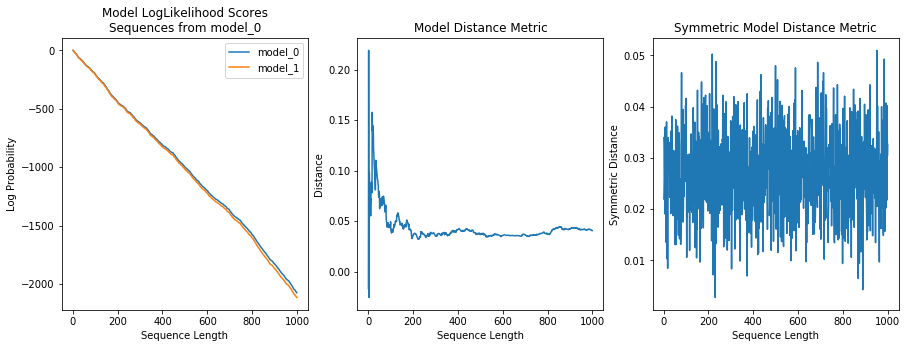

In [33]:
_ = distance.run_model_distance_tests(classifier_map.estimators[0], classifier_mle.estimators[1])


In [20]:
HMMSearch.HMMSearch?

In [21]:

label_1_train_X = train_X[train_Y == 1]
label_1_train_Y = train_Y[train_Y == 1]

label_0_train_X = train_X[train_Y == 0].copy()
label_0_train_Y = train_Y[train_Y == 0]

In [22]:
label_0_train_X.shape, label_1_train_X.shape

((45288, 21), (5946, 21))

In [23]:
label_1_train_X.head()

Day-21  Day-20  Day-19  Day-18  Day-17  Day-16  Day-15  Day-14  Day-13  \
62819       8       0       0       4       0       0       0       4       2   
66741       8       8       8      16       1       0      12       0       1   
66908       8       8       8       8       8       8      14      14       8   
66562       9       0       6      16       1       0       0       6       0   
66952       9       8       6      10       6      10       6      12      12   

       Day-12  ...    Day-10  Day-9  Day-8  Day-7  Day-6  Day-5  Day-4  Day-3  \
62819       0  ...         2      4     12      4      1      0      0      0   
66741       0  ...        12     12      0      0     12      0      6     12   
66908      14  ...        14      2      2     14      2      2     14      8   
66562      16  ...         4      0      0      4      4      1      0     16   
66952       1  ...        10     17      6     14      1      0      2      3   

       Day-2  Day-1  
62819      0      5  
66741     12      5  
66908      8      2  
66562      4      1  
66952      4      0  

[5 rows x 21 columns]

In [24]:
search_1 = HMMSearch.HMMSearch(MultinomialHMM.MultinomialHMM(log_level=logging.ERROR), n_components=np.arange(1,21))
search_1.fit(label_1_train_X)

Not Exchanging at 1: -310276.1590856305 for -310276.1590856305
Not Exchanging at 1: -310276.1590856305 for -310276.1590856305
Not Exchanging at 1: -310276.1590856305 for -310276.1590856305
Not Exchanging at 2: -272673.1730009136 for -278758.9035968271
Not Exchanging at 2: -272673.1730009136 for -278758.903596763
Exchanging at 2: -272673.1730009136 for -272673.1730008166
Exchanging at 3: -263162.76324627217 for -245452.3784501657
Exchanging at 3: -245452.3784501657 for -245433.40073206244
Exchanging at 3: -245433.40073206244 for -245433.39097348094
Not Exchanging at 4: -236104.0539500415 for -236104.05451532273
Not Exchanging at 4: -236104.0539500415 for -242073.1830899245
Not Exchanging at 4: -236104.0539500415 for -236104.05471094607
Not Exchanging at 5: -232567.57095327805 for -232582.2850348392
Exchanging at 5: -232567.57095327805 for -232567.44647854893
Not Exchanging at 5: -232567.44647854893 for -235859.71458667546
Not Exchanging at 6: -230815.1397622723 for -231659.0014051594
No

HMMSearch(criterion='bic',
     estimator=MultinomialHMM(implementation='cython', init_A=True, init_B=True,
        init_pi=True, log_level=40, n_components=1, n_iterations=100,
        random_state=None, tol=1e-06),
     n_components=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
     n_inits=4, n_jobs=-1, verbose=False)

In [26]:

search_0 = HMMSearch.HMMSearch(MultinomialHMM.MultinomialHMM(log_level=logging.ERROR), n_components=np.arange(1,20))
search_0.fit(label_0_train_X)

Not Exchanging at 1: -2382603.441184743 for -2382603.441184743
Not Exchanging at 1: -2382603.441184743 for -2382603.441184743
Not Exchanging at 1: -2382603.441184743 for -2382603.441184743
Not Exchanging at 2: -2106010.6409697984 for -2194383.6748110484
Exchanging at 2: -2106010.6409697984 for -2101228.289484476
Exchanging at 2: -2101228.289484476 for -2101228.289301967
Exchanging at 3: -1943412.821825976 for -1934322.5409525337
Not Exchanging at 3: -1934322.5409525337 for -1934322.5417475647
Not Exchanging at 3: -1934322.5409525337 for -1943414.0386198547
Not Exchanging at 4: -1908762.3470409818 for -1911369.6858217681
Exchanging at 4: -1908762.3470409818 for -1863877.7465386167
Not Exchanging at 4: -1863877.7465386167 for -1863877.7472443185
Exchanging at 5: -1836093.3935767892 for -1836092.3765714627
Not Exchanging at 5: -1836092.3765714627 for -1836095.1285473173
Not Exchanging at 5: -1836092.3765714627 for -1856807.8984764887
Exchanging at 6: -1818047.394313001 for -1817945.816365

HMMSearch(criterion='bic',
     estimator=MultinomialHMM(implementation='cython', init_A=True, init_B=True,
        init_pi=True, log_level=40, n_components=1, n_iterations=100,
        random_state=None, tol=1e-06),
     n_components=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
     n_inits=4, n_jobs=-1, verbose=False)

In [27]:
scores_1 = pd.DataFrame(search_1.scores_)
scores_0 = pd.DataFrame(search_0.scores_)

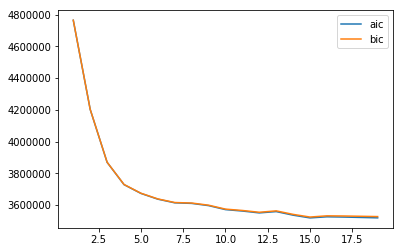

In [28]:
scores_0.T[["aic", "bic"]].plot()

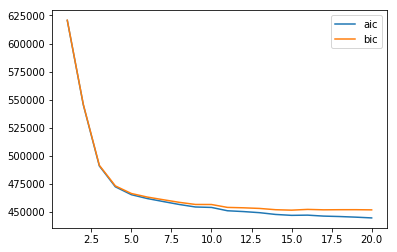

In [29]:
scores_1.T[["aic", "bic"]].plot()

In [31]:
scores_0.T[["ll"]].plot()

In [32]:
scores_1.T["ll"].plot()

In [39]:
search_0.bests_[10]

MultinomialHMM(implementation='cython', init_A=True, init_B=True,
        init_pi=True, log_level=40, n_components=10, n_iterations=100,
        random_state=None, tol=1e-06)

In [36]:
search_1.best_model_

MultinomialHMM(implementation='cython', init_A=True, init_B=True,
        init_pi=True, log_level=40, n_components=15, n_iterations=100,
        random_state=None, tol=1e-06)

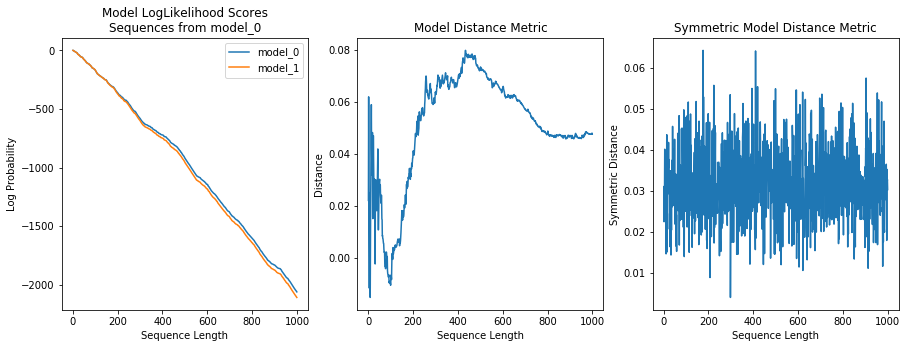

In [41]:
_ = distance.run_model_distance_tests(search_1.bests_[15], search_0.bests_[15])
